In [1]:
#Importing basic Libraries and important libraries 
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, mean_squared_error

In [2]:
data = pd.read_csv("E:\dataset_folder\winequalityN.csv")

In [3]:
data.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

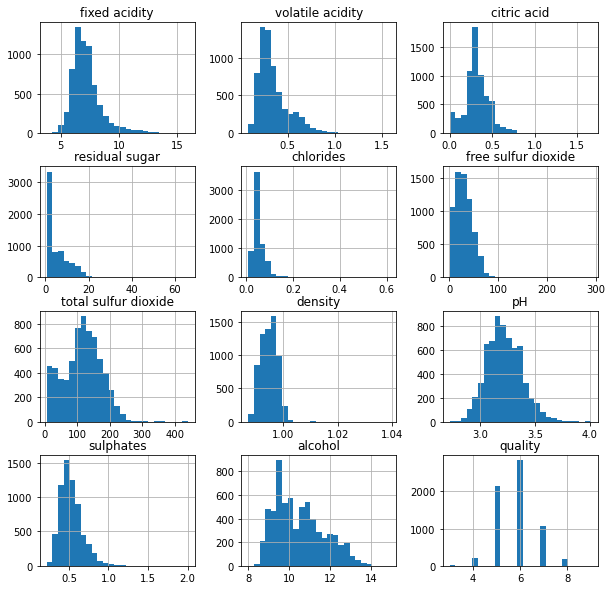

In [5]:
#graphical representation to find usefull information
data.hist(bins=25,figsize=(10,10))

<AxesSubplot:>

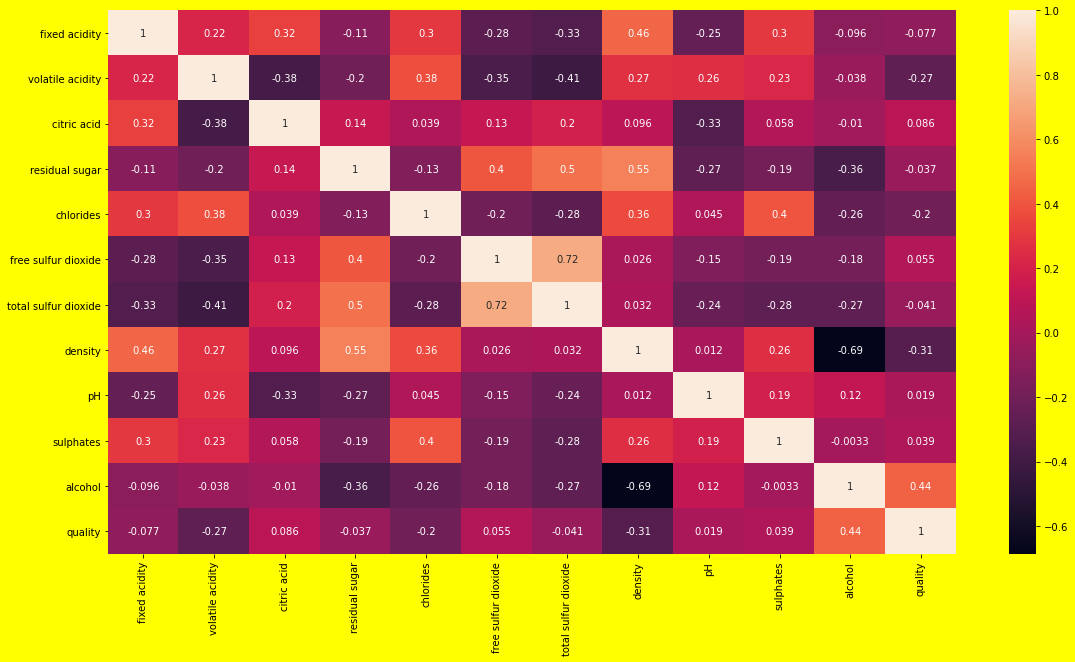

In [6]:
#Going to find the correlation between the features
#To find the relationship between the two features we find the correlation between them using heat map

#ploting heatmap
plt.figure(figsize=[19,10],facecolor='yellow')
sb.heatmap(data.corr(),annot=True)

In [7]:
for a in range(len(data.corr().columns)):
    for b in range(a):
        if abs(data.corr().iloc[a,b]) >0.7:
            name = data.corr().columns[a]
            print(name)

total sulfur dioxide


In [8]:
new_data=data.drop('total sulfur dioxide',axis=1)
# Drop multiple columns from the DataFrame
columns_to_drop = ['volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'sulphates']
new_data = new_data.drop(columns_to_drop, axis=1)

# Now the new_data DataFrame will have only the desired columns after dropping the specified ones.
print(new_data)



       type  fixed acidity  residual sugar  density    pH  alcohol  quality
0     white            7.0            20.7  1.00100  3.00      8.8        6
1     white            6.3             1.6  0.99400  3.30      9.5        6
2     white            8.1             6.9  0.99510  3.26     10.1        6
3     white            7.2             8.5  0.99560  3.19      9.9        6
4     white            7.2             8.5  0.99560  3.19      9.9        6
...     ...            ...             ...      ...   ...      ...      ...
6492    red            6.2             2.0  0.99490  3.45     10.5        5
6493    red            5.9             2.2  0.99512  3.52     11.2        6
6494    red            6.3             2.3  0.99574  3.42     11.0        6
6495    red            5.9             2.0  0.99547  3.57     10.2        5
6496    red            6.0             3.6  0.99549  3.39     11.0        6

[6497 rows x 7 columns]


In [9]:
new_data

,type,fixed acidity,residual sugar,density,pH,alcohol,quality
0,white,7.0,20.7,1.00100,3.00,8.8,6
1,white,6.3,1.6,0.99400,3.30,9.5,6
2,white,8.1,6.9,0.99510,3.26,10.1,6
3,white,7.2,8.5,0.99560,3.19,9.9,6
4,white,7.2,8.5,0.99560,3.19,9.9,6
...,...,...,...,...,...,...,...
6492,red,6.2,2.0,0.99490,3.45,10.5,5
6493,red,5.9,2.2,0.99512,3.52,11.2,6
6494,red,6.3,2.3,0.99574,3.42,11.0,6
6495,red,5.9,2.0,0.99547,3.57,10.2,5


In [10]:
#Handling null values
new_data.isnull().sum()

type               0
fixed acidity     10
residual sugar     2
density            0
pH                 9
alcohol            0
quality            0
dtype: int64

In [11]:
# Select only the numeric columns from the DataFrame
numeric_columns = new_data.select_dtypes(include='number')

# Calculate the mean of each numeric column
column_means = numeric_columns.mean()

# Fill missing values in the numeric columns with their respective means
new_data[numeric_columns.columns] = numeric_columns.fillna(column_means)


In [12]:
# for categorical values
next_data = pd.get_dummies(new_data,drop_first=True)
next_data

,fixed acidity,residual sugar,density,pH,alcohol,quality,type_white
0,7.0,20.7,1.00100,3.00,8.8,6,1
1,6.3,1.6,0.99400,3.30,9.5,6,1
2,8.1,6.9,0.99510,3.26,10.1,6,1
3,7.2,8.5,0.99560,3.19,9.9,6,1
4,7.2,8.5,0.99560,3.19,9.9,6,1
...,...,...,...,...,...,...,...
6492,6.2,2.0,0.99490,3.45,10.5,5,0
6493,5.9,2.2,0.99512,3.52,11.2,6,0
6494,6.3,2.3,0.99574,3.42,11.0,6,0
6495,5.9,2.0,0.99547,3.57,10.2,5,0


In [13]:
# In this dataset ‘Type’ feature contains two types Red and White, where Red consider as 0 and white considers as 1.

next_data['best quality'] = [1 if x >= 7 else 0 for x in next_data['quality']]
print(next_data)


      fixed acidity  residual sugar  density    pH  alcohol  quality  \
0               7.0            20.7  1.00100  3.00      8.8        6   
1               6.3             1.6  0.99400  3.30      9.5        6   
2               8.1             6.9  0.99510  3.26     10.1        6   
3               7.2             8.5  0.99560  3.19      9.9        6   
4               7.2             8.5  0.99560  3.19      9.9        6   
...             ...             ...      ...   ...      ...      ...   
6492            6.2             2.0  0.99490  3.45     10.5        5   
6493            5.9             2.2  0.99512  3.52     11.2        6   
6494            6.3             2.3  0.99574  3.42     11.0        6   
6495            5.9             2.0  0.99547  3.57     10.2        5   
6496            6.0             3.6  0.99549  3.39     11.0        6   

      type_white  best quality  
0              1             0  
1              1             0  
2              1             0  
3  

In [14]:
next_data


,fixed acidity,residual sugar,density,pH,alcohol,quality,type_white,best quality
0,7.0,20.7,1.00100,3.00,8.8,6,1,0
1,6.3,1.6,0.99400,3.30,9.5,6,1,0
2,8.1,6.9,0.99510,3.26,10.1,6,1,0
3,7.2,8.5,0.99560,3.19,9.9,6,1,0
4,7.2,8.5,0.99560,3.19,9.9,6,1,0
...,...,...,...,...,...,...,...,...
6492,6.2,2.0,0.99490,3.45,10.5,5,0,0
6493,5.9,2.2,0.99512,3.52,11.2,6,0,0
6494,6.3,2.3,0.99574,3.42,11.0,6,0,0
6495,5.9,2.0,0.99547,3.57,10.2,5,0,0


In [15]:
#spllting dataset
x = next_data.drop(['quality','best quality'], axis = 1)
y = next_data['best quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)


In [16]:
# Normalization
# We do normalization on numerical data because our data is unbalanced it means the difference between the variable values
# is high so we convert them into 1 and 0.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
new_data_scaled = scaler.transform(new_data)

[[0.34710744 0.13803681 0.208984   0.46511628 0.26086957 1.        ]
 [0.20661157 0.2607362  0.23269713 0.30232558 0.11594203 1.        ]
 [0.24793388 0.18711656 0.21149026 0.21705426 0.14492754 1.        ]
 ...
 [0.33884298 0.01226994 0.16541353 0.5503876  0.2173913  0.        ]
 [0.24793388 0.01687117 0.16753422 0.53488372 0.24637681 0.        ]
 [0.19008264 0.11042945 0.18237902 0.51937984 0.2173913  1.        ]]


In [17]:
# Applying model (Random Forest Classifier)
# importing modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error
#creating RandomForestClassifier constructor
rnd = RandomForestClassifier()
# fit data
fit_rnd = rnd.fit(new_xtrain, y_train)
# predicting score
rnd_score = rnd.score(new_xtest, y_test)
print('Accuracy of the model: {:.2f}%'.format(rnd_score * 100))

# making predictions
y_pred = rnd.predict(new_xtest)

# calculating mean squared error
rnd_MSE = mean_squared_error(y_test, y_pred)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)

print('Mean Squared Error: {:.4f}'.format(rnd_MSE))
print('Root Mean Squared Error: {:.4f}'.format(rnd_RMSE))

# classification report
print(classification_report(y_test, y_pred))


Accuracy of the model: 85.31%
Mean Squared Error: 0.1469
Root Mean Squared Error: 0.3833
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1029
           1       0.71      0.50      0.59       271

    accuracy                           0.85      1300
   macro avg       0.79      0.72      0.75      1300
weighted avg       0.84      0.85      0.84      1300



In [18]:
predicted_df = {'predicted_values': y_pred, 'original_values': y_test}
pd.DataFrame(predicted_df).tail(40)

,predicted_values,original_values
3542,0,0
5787,0,0
3479,1,1
3788,0,0
93,1,1
6160,0,0
1153,0,0
4074,0,0
659,0,0
1944,0,0


In [19]:
import pickle

# Save the 'rnd' object as a pickle file named 'random_forest_model.pkl'
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rnd, file)


In [ ]:
    # # Prepare the new data (rest of the features)
# # Replace the following with the new data you want to predict
# new_data = pd.DataFrame({
#     'sepal length (cm)': [5.1, 6.2, 4.7],  
#     'sepal width (cm)': [3.5, 3.4, 3.2],   
#     'petal length (cm)': [1.4, 5.4, 1.3],  
#     'petal width (cm)': [0.2, 2.3, 0.2]    
# })

# # Make predictions on the new data
# new_predictions = model.predict(new_data)

# # Convert numeric predictions to species names
# def inverse_converter(specie):
#     if specie == 0:
#         return 'setosa'
#     elif specie == 1:
#         return 'versicolor'
#     else:
#         return 'virginica'

# new_predictions_species = [inverse_converter(int(specie)) for specie in new_predictions]

# # Display the predicted species
# new_data['predicted_species'] = new_predictions_species
# print(new_data)
